In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
atom_df = pd.read_csv(Path('../../resources/prices/coin_Cosmos.csv'), index_col='SNo')
atom_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Cosmos,ATOM,2019-03-15 23:59:59,7.715249,6.432468,6.633174,7.504351,6.057301e+06,0.000000e+00
2,Cosmos,ATOM,2019-03-16 23:59:59,8.305615,6.694531,7.507990,7.383882,3.477393e+06,0.000000e+00
3,Cosmos,ATOM,2019-03-17 23:59:59,7.357443,4.727895,7.357443,4.776164,2.653565e+06,0.000000e+00
4,Cosmos,ATOM,2019-03-18 23:59:59,5.229982,4.828242,4.828242,5.110341,2.567201e+06,0.000000e+00
5,Cosmos,ATOM,2019-03-19 23:59:59,5.206172,4.794501,5.099978,4.821883,3.891084e+06,0.000000e+00
...,...,...,...,...,...,...,...,...,...
712,Cosmos,ATOM,2021-02-23 23:59:59,23.289343,15.367366,21.254798,20.128941,2.172119e+09,4.243806e+09
713,Cosmos,ATOM,2021-02-24 23:59:59,21.251337,18.801083,20.144575,19.499604,1.094986e+09,4.112144e+09
714,Cosmos,ATOM,2021-02-25 23:59:59,20.464055,17.671458,19.497597,17.763396,8.089071e+08,3.746936e+09


In [4]:
atom_df['Date'] = pd.to_datetime(atom_df['Date']).dt.date
atom_df['Date'] = pd.to_datetime(atom_df['Date'])
atom_df['Spread'] = atom_df.High - atom_df.Low
atom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 1 to 716
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       716 non-null    object        
 1   Symbol     716 non-null    object        
 2   Date       716 non-null    datetime64[ns]
 3   High       716 non-null    float64       
 4   Low        716 non-null    float64       
 5   Open       716 non-null    float64       
 6   Close      716 non-null    float64       
 7   Volume     716 non-null    float64       
 8   Marketcap  716 non-null    float64       
 9   Spread     716 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 61.5+ KB


## Plot the closing value of Cosmos over time

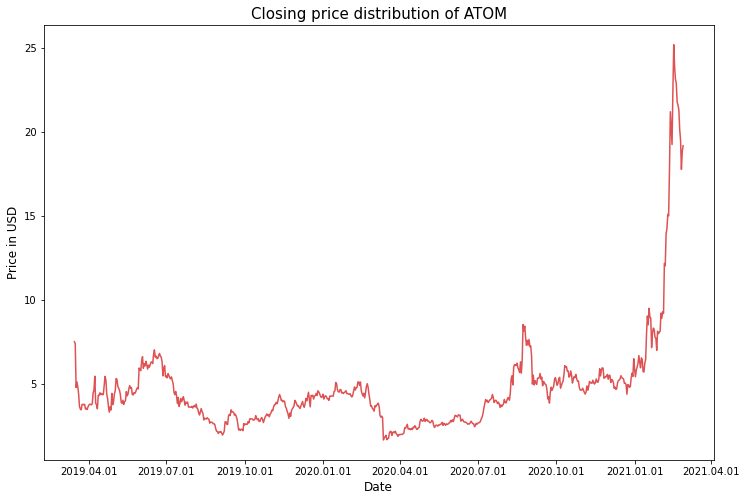

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = atom_df.Close.values, x=atom_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = atom_df.Close.values, x=atom_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ATOM", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

atom_df['Date_mpl'] = atom_df['Date'].apply(lambda x: mdates.date2num(x))

temp_atom_df = atom_df.copy(deep=False)
temp_atom_df = temp_atom_df.set_index(['Date'])
temp_atom_df = temp_atom_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_atom_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2019-03-15,7.715249,6.432468,6.633174,7.504351,6.057301e+06,17970.0
2019-03-16,8.305615,6.694531,7.507990,7.383882,3.477393e+06,17971.0
2019-03-17,7.357443,4.727895,7.357443,4.776164,2.653565e+06,17972.0
2019-03-18,5.229982,4.828242,4.828242,5.110341,2.567201e+06,17973.0
2019-03-19,5.206172,4.794501,5.099978,4.821883,3.891084e+06,17974.0
...,...,...,...,...,...,...
2021-02-23,23.289343,15.367366,21.254798,20.128941,2.172119e+09,18681.0
2021-02-24,21.251337,18.801083,20.144575,19.499604,1.094986e+09,18682.0
2021-02-25,20.464055,17.671458,19.497597,17.763396,8.089071e+08,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


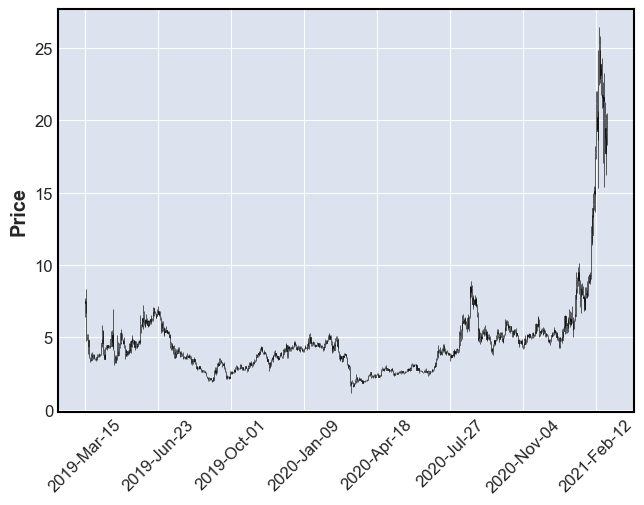

In [7]:
mpf.plot(temp_atom_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Cosmos.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
741,2021-03-25 23:59:59,13.788919,10.939789,16.388813
742,2021-03-26 23:59:59,13.988404,11.345155,16.504662
743,2021-03-27 23:59:59,14.058656,11.435809,16.756326
744,2021-03-28 23:59:59,14.058800,11.504280,16.506646
745,2021-03-29 23:59:59,14.136284,11.383726,16.847568


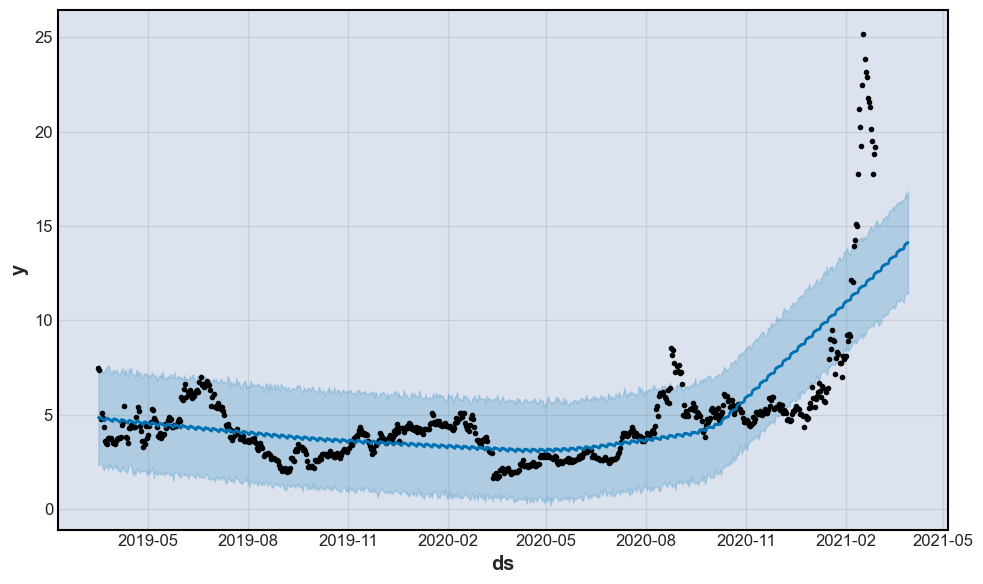

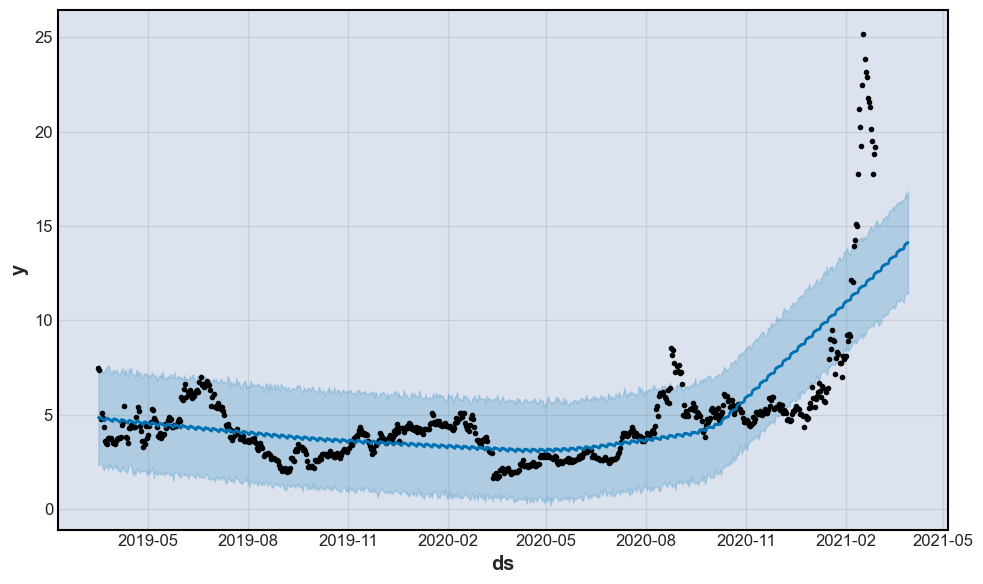

In [10]:
m.plot(forecast)

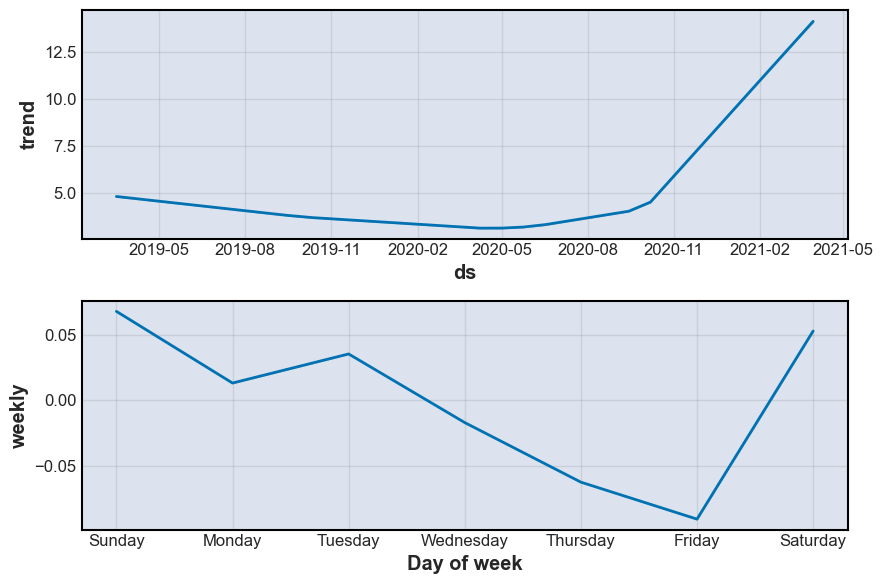

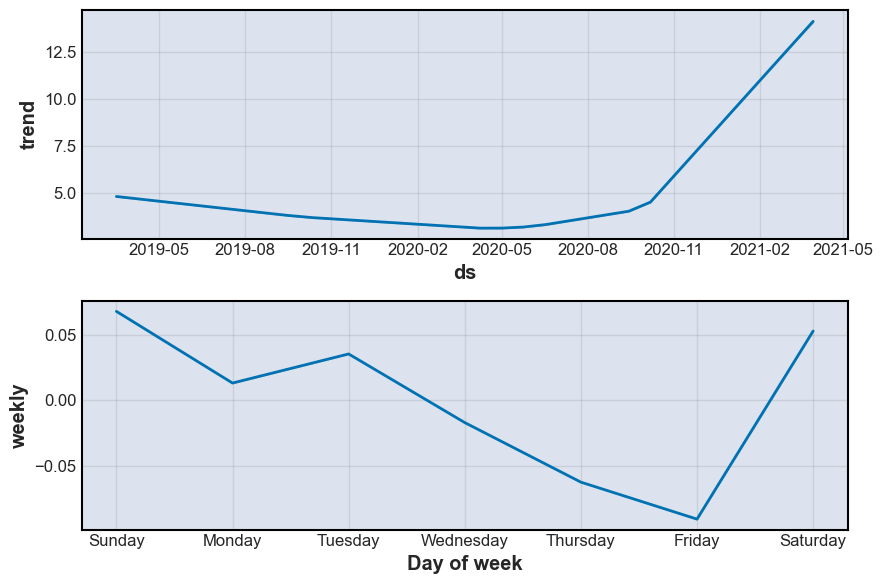

In [11]:
m.plot_components(forecast)